In [38]:
from sklearn.datasets import fetch_california_housing
cal=fetch_california_housing()

In [94]:
import pandas as pd
housing=pd.DataFrame(cal.data,columns=cal.feature_names)
housing["target"]=cal.target

In [95]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [96]:
housing.drop(["Latitude","Longitude","AveBedrms",],axis=1,inplace=True)

In [97]:
housing.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,target
0,8.3252,41.0,6.984127,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,3.422


In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [99]:
housing_np=scaler.fit_transform(housing)

In [100]:
housing_df=pd.DataFrame(housing_np,columns=housing.columns)

In [101]:
housing_df

,MedInc,HouseAge,AveRooms,Population,AveOccup,target
0,2.344766,0.982143,0.628559,-0.974429,-0.049597,2.129631
1,2.332238,-0.607019,0.327041,0.861439,-0.092512,1.314156
2,1.782699,1.856182,1.155620,-0.820777,-0.025843,1.258693
3,0.932968,1.856182,0.156966,-0.766028,-0.050329,1.165100
4,-0.012881,1.856182,0.344711,-0.759847,-0.085616,1.172900
...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,-0.512592,-0.049110,-1.115804
20636,-0.691593,-0.845393,0.276881,-0.944405,0.005021,-1.124470
20637,-1.142593,-0.924851,-0.090318,-0.369537,-0.071735,-0.992746
20638,-1.054583,-0.845393,-0.040211,-0.604429,-0.091225,-1.058608


In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(housing_df.drop("target",axis=1),housing_df.target,test_size=0.3,random_state=100)

In [103]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [104]:
model.fit(X_train,y_train)

LinearRegression()

In [105]:
model.score(X_test,y_test)

0.5282418141197303

In [106]:
import matplotlib.pyplot as plt

ValueError: x and y must be the same size

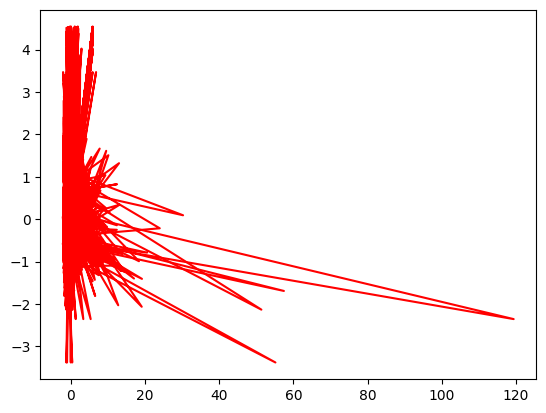

In [107]:
plt.plot(X_train,model.predict(X_train),color="r")
plt.scatter(X_train,y_train)

In [108]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)

In [109]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [110]:
X_train_poly,X_train

(array([[ 1.00000000e+00,  2.85119397e+00, -2.09728520e-01, ...,
          6.49135441e-02, -2.95776601e-03,  1.34769714e-04],
        [ 1.00000000e+00, -1.25334323e+00,  8.23226501e-01, ...,
          2.18717076e-02, -6.17324812e-03,  1.74238761e-03],
        [ 1.00000000e+00,  6.44301851e-01,  3.46478030e-01, ...,
          3.68544297e-01, -4.07827042e-03,  4.51296893e-05],
        ...,
        [ 1.00000000e+00,  9.31809477e-01, -2.03726433e+00, ...,
          3.83352615e+01,  3.17048073e-01,  2.62211544e-03],
        [ 1.00000000e+00, -7.84024665e-01,  5.05394187e-01, ...,
          3.52637271e-01, -1.32638034e-02,  4.98893611e-04],
        [ 1.00000000e+00,  3.97062137e-01,  1.53834921e+00, ...,
          8.36247053e-02,  5.04476827e-03,  3.04332156e-04]]),
          MedInc  HouseAge  AveRooms  Population  AveOccup
 3472   2.851194 -0.209729  0.947332    0.254781 -0.011609
 13593 -1.253343  0.823227 -0.423337   -0.147891  0.041742
 3507   0.644302  0.346478  0.141353   -0.607078  0.

In [111]:
model.fit(X_train_poly,y_train)

LinearRegression()

In [114]:
y_pred=model.predict(X_test_poly)

In [115]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.1626850914017317

ValueError: x and y must be the same size

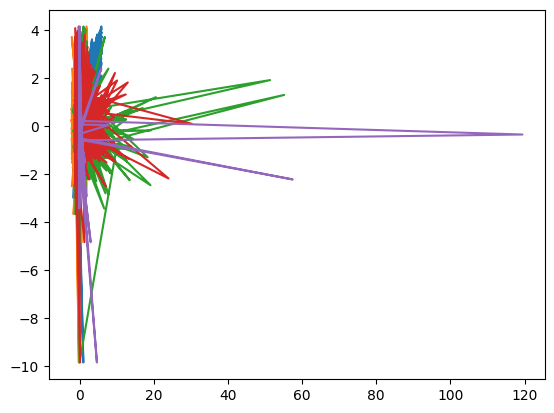

In [116]:
plt.plot(X_train,model.predict(X_train_poly))
plt.scatter(X_train,y_train)